In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> 行列式的可视化</font>

行列式的物理概念是计算由向量围成的面积，例如我们有一个矩阵
$$
A=\left[\begin{matrix} a & b\cr c & d \end{matrix}\right]
$$
那么行列式就是由向量围成的平行四边形
$$
\left[\begin{matrix} a \cr c  \end{matrix}\right]\qquad \left[\begin{matrix} b \cr d  \end{matrix}\right]
$$

这里我们用一个矩阵来演示
$$
\left[\begin{matrix} 2 & 0\cr 0 & 3 \end{matrix}\right]
$$
这两个向量围成的面积实际上是一个矩形，这也很容易理解。

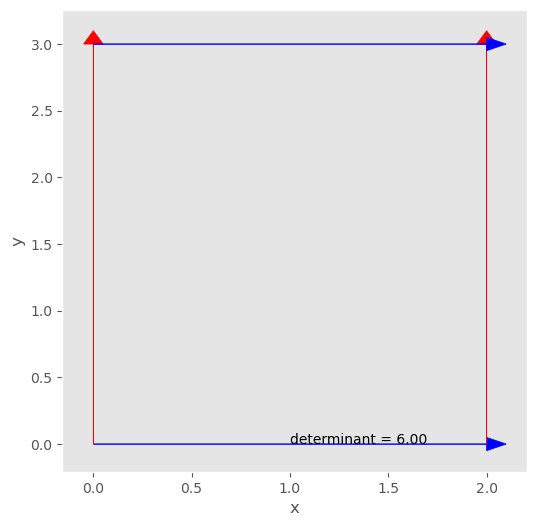

In [8]:
matrix = np.array([[2, 0], [0, 3]])
def plot_2ddet(matrix):
    # 计算矩阵的行列式
    det = np.linalg.det(matrix)

    # 创建一个图形和坐标轴
    fig, ax = plt.subplots(figsize=(6, 6))

    # 绘制这些向量
    ax.arrow(0, 0, matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='b')
    ax.arrow(0, 0, matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='r')
    ax.arrow(matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='r')
    ax.arrow(matrix[1,0], matrix[1,1], matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='b')

    # 标注行列式的值
    ax.annotate(f'determinant = {det:.2f}', (matrix[0,0]/2, matrix[0,1]/2))

    # 添加标签并显示图形
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    plt.show()
    
if __name__ == '__main__':
    plot_2ddet(matrix)

如果矩阵不是对角矩阵，那么面积将呈现出平行四边形的形状。类似地，你可以想象在三维空间中，行列式测量的是平行六面体的体积。

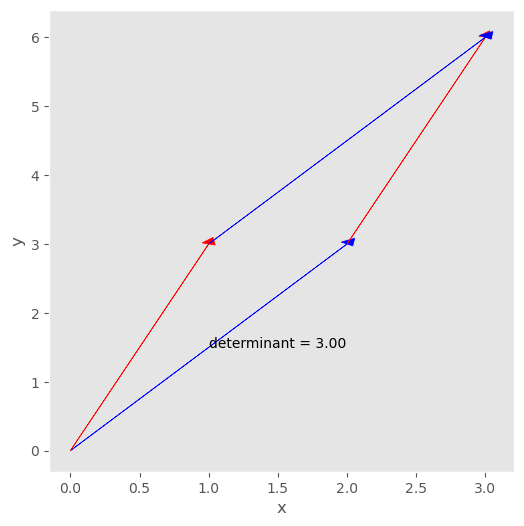

In [9]:
matrix = np.array([[2, 3], [1, 3]])
plot_2ddet(matrix)

然而，行列式可以是一个负数，这意味着我们像翻转一张纸一样翻转了这个面积。

如果两个向量线性相关，那么它们将共线，形成的面积将为零。

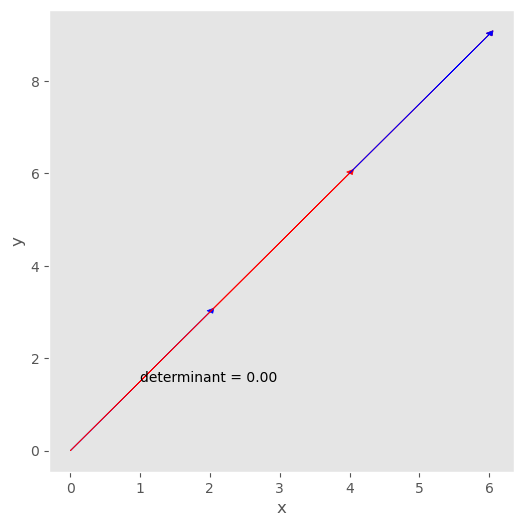

In [10]:
matrix = np.array([[2, 3], [4, 6]])
plot_2ddet(matrix)

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
这正是为什么如果我们希望一个矩阵具有满秩或线性独立的列，那么行列式就不能等于零的确切原因！
</div>

这里是一个平行六面体的绘图，以防你不清楚它是什么。

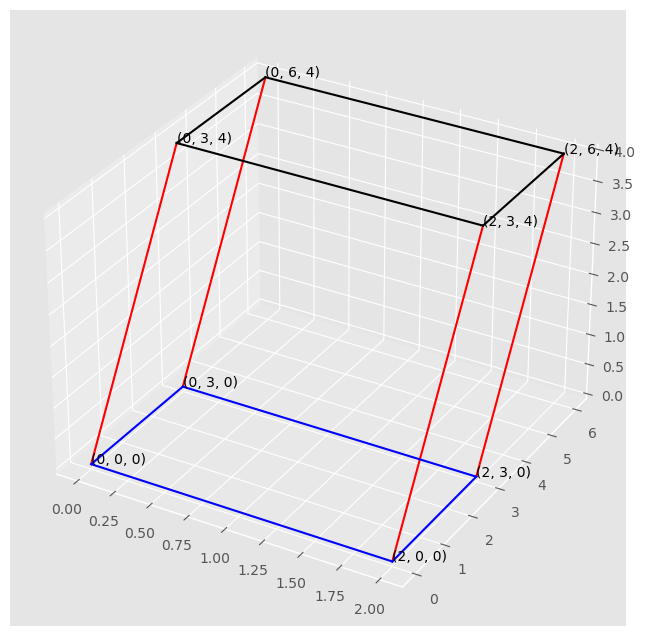

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 定义平行六面体的顶点
vertices = [[2, 0, 0], [2, 3, 0], [0, 3, 0], [0, 0, 0],
            [2, 3, 4], [2, 6, 4], [0, 6, 4], [0, 3, 4]]

# 绘制平行六面体的边
for i in range(4):
    xs = [vertices[i][0], vertices[i+4][0]]
    ys = [vertices[i][1], vertices[i+4][1]]
    zs = [vertices[i][2], vertices[i+4][2]]
    ax.plot(xs, ys, zs, color='red')

for i in range(4):
    xs = [vertices[i][0], vertices[(i+1)%4][0]]
    ys = [vertices[i][1], vertices[(i+1)%4][1]]
    zs = [vertices[i][2], vertices[(i+1)%4][2]]
    ax.plot(xs, ys, zs, color='blue')

for i in range(4,8):
    xs = [vertices[i][0], vertices[(i+1)%4+4][0]]
    ys = [vertices[i][1], vertices[(i+1)%4+4][1]]
    zs = [vertices[i][2], vertices[(i+1)%4+4][2]]
    ax.plot(xs, ys, zs, color='k')

# 在每个顶点添加坐标的注释
for vertex in vertices:
    ax.text(vertex[0], vertex[1], vertex[2], f"({vertex[0]}, {vertex[1]}, {vertex[2]})")

plt.show()

# <font face="gotham" color="purple"> 行列式的计算</font>

对于 $2\times 2$ 矩阵 $A$，行列式的计算算法是
$$
  A=\left|\begin{matrix} a & b\cr c & d \end{matrix}\right| \qquad\text{等价于}\qquad \text{det}  A=ad-bc
$$

现在让我们用 SymPy 进行实验

In [13]:
a, b, c, d, e, f, g, h, i = sy.symbols('a, b, c, d, e, f, g, h, i', real = True)

对于定义的符号，$2\times 2$ 和 $3\times 3$ 行列式的算法是

In [14]:
A = sy.Matrix([[a, b], [c, d]])
A.det()

In [15]:
B = sy.Matrix([[a, b, c], [d, e, f], [g, h, i]])
B.det()

## <font face="gotham" color="purple"> 余子式展开</font>

矩阵 $A$ 的 $(i,j)$-**余子式**，记为 $C_{ij}$，定义为
$$C_{i j}=(-1)^{i+j} \operatorname{det} A_{i j} = (-1)^{i+j} M_{ij}$$
其中 $M_{ij}$ 是**子行列式**，即去掉第 $i$ 行和第 $j$ 列后的行列式。

考虑一个矩阵 $A$
$$A=\left[\begin{array}{rrr}
1 & 5 & 0 \\
2 & 4 & -1 \\
0 & -2 & 0
\end{array}\right]$$
任何行列式都可以沿着任意行或列展开，我们沿着第一行展开行列式
$$\begin{aligned}
\operatorname{det} A &=1 \cdot \operatorname{det}\left[\begin{array}{rr}
4 & -1 \\
-2 & 0
\end{array}\right]-5 \cdot \operatorname{det}\left[\begin{array}{cc}
2 & -1 \\
0 & 0
\end{array}\right]+0 \cdot \operatorname{det}\left[\begin{array}{rr}
2 & 4 \\
0 & -2
\end{array}\right] \\
&=1(0-2)-5(0-0)+0(-4-0)=-2
\end{aligned}$$

在每个子行列式前的标量，即 $1$、$-5$ 和 $0$，是矩阵 $A$ 的第一行的元素。

一般来说，沿着第 $i$ 行或第 $j$ 列展开的行列式是
$$
\operatorname{det} A=a_{i 1} C_{i 1}+a_{i 2} C_{i 2}+\cdots+a_{i n} C_{i n}
$$
$$
\operatorname{det} A=a_{1 j} C_{1 j}+a_{2 j} C_{2 j}+\cdots+a_{n j} C_{n j}
$$

### <font face="gotham" color="purple"> SymPy 行列式展开的一个例子</font>

考虑下面的矩阵，并执行余子式展开

In [16]:
A = sy.Matrix([[49, 0, 61], [73, 22, 96], [2, 0, 32]]);A

⎡49  0   61⎤
⎢          ⎥
⎢73  22  96⎥
⎢          ⎥
⎣2   0   32⎦

余子式展开中，选择含有两个零的列的计算负担最小：

$$\operatorname{det} A = a_{12}(-1)^{1+2}C_{12}+a_{22}(-1)^{2+2}C_{22}+a_{32}(-1)^{3+2}C_{32}$$

我们可以使用 SymPy 函数计算子行列式： ```sy.matrices.matrices.MatrixDeterminant.minor(A, i, 1)```. 此外，我们定义一个函数进行余子式展开：

In [23]:
def cof_exp(matrix, c): # c 是我们要展开的列
    detA = 0
    for i in range(matrix.shape[1]): # matrix.shape[1] 是列的总数
        detA += matrix[i, c]*(-1)**(i+c)*sy.matrices.matrices.MatrixDeterminant.minor(matrix, i, c)
    return detA

In [18]:
cof_exp(A,1)

验证 SymPy 的行列式评估函数的展开算法是很容易的。

In [19]:
A.det()

实际上，你可以用任意的具有多个零的随机矩阵进行实验，下面的函数有参数 ```percent=70``` 表示 $70%$ 的元素是非零的。

In [20]:
B = sy.randMatrix(r = 7, min=10, max=50, percent=70);B

⎡48  28  0   40  45  40  25⎤
⎢                          ⎥
⎢0   46  44  31  0   25  40⎥
⎢                          ⎥
⎢33  40  48  36  27  0   0 ⎥
⎢                          ⎥
⎢0   19  50  0   39  0   0 ⎥
⎢                          ⎥
⎢29  30  0   11  0   0   22⎥
⎢                          ⎥
⎢41  0   41  29  14  34  45⎥
⎢                          ⎥
⎣19  15  40  0   26  0   27⎦

使用我们自定义的函数计算行列式

In [21]:
cof_exp(B,1)

然后验证使用行列式方法 ```.det()```的结果。我们可以看到，余子式展开的确有效！

In [22]:
B.det()

**子行列式矩阵**也可以通过使用代码 ```sy.matrices.matrices.MatrixDeterminant.minor_submatrix()``` 提取，例如，$B$ 的 $M_{23}$ 矩阵是

In [24]:
sy.matrices.matrices.MatrixDeterminant.minor_submatrix(B, 1, 2) # Pythonic indexing

⎡48  28  40  45  40  25⎤
⎢                      ⎥
⎢33  40  36  27  0   0 ⎥
⎢                      ⎥
⎢0   19  0   39  0   0 ⎥
⎢                      ⎥
⎢29  30  11  0   0   22⎥
⎢                      ⎥
⎢41  0   29  14  34  45⎥
⎢                      ⎥
⎣19  15  0   26  0   27⎦

**余子式矩阵**是包含原始矩阵所有余子式的矩阵，函数 ```.cofactor_matrix()``` 可以完成这项工作。

$$A=\left[\begin{array}{rrr}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{array}\right]=
\left[\begin{array}{rrr}
(-1)^{1+1}M_{11} & (-1)^{1+2}M_{12} & (-1)^{1+3}M_{13} \\
(-1)^{2+1}M_{21} & (-1)^{2+2}M_{22} & (-1)^{2+3}M_{23} \\
(-1)^{3+1}M_{31} & (-1)^{3+2}M_{32} & (-1)^{3+3}M_{33}
\end{array}\right]
$$



In [25]:
sy.matrices.matrices.MatrixDeterminant.cofactor_matrix(A)

⎡ 704   -2144  -44 ⎤
⎢                  ⎥
⎢  0    1446    0  ⎥
⎢                  ⎥
⎣-1342  -251   1078⎦

## <font face="gotham" color="purple"> 三角矩阵</font>

如果 $A$ 是三角矩阵，那么可以重复应用余子式展开，结果将是主对角线上元素的乘积。

$$
\operatorname{det A}_{n\times n} = \prod_{i=1}^n a_{ii}
$$

其中 $a_{ii}$ 是对角线元素。

下面是证明，从 $A$ 开始

$$
A=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 n} \\
& a_{22} & \cdots & a_{2 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
在第一列上展开余子式，
$$
a_{11} \cdot \left[\begin{array}{cccc}
a_{22} & a_{22} & \cdots & a_{2 n} \\
& a_{33} & \cdots & a_{3 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
继续余子式展开
$$
\operatorname{det} A=a_{11} a_{22} \cdot \left[\begin{array}{cccc}
a_{33} & a_{34} & \cdots & a_{3 n} \\
& a_{44} & \cdots & a_{4 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
迭代展开，最终
$$
\text { Det } A=a_{11} \cdots a_{n-2, n-2} \cdot \left[\begin{array}{cc}
a_{n-1, n-1} & a_{n-1, n} \\
a_{n n}
\end{array}\right]=a_{11} \cdots a_{n n}
$$

现在让我们通过一个数值示例来验证，生成一个随机的上三角矩阵。

In [29]:
A = np.round(np.random.rand(5,5)*100)
A_triu = np.triu(A); A_triu

array([[77.,  6., 41., 80., 19.],
       [ 0., 11., 48., 76.,  8.],
       [ 0.,  0., 76., 36.,  6.],
       [ 0.,  0.,  0.,  4., 71.],
       [ 0.,  0.,  0.,  0., 10.]])

使用 np.linalg.det 计算行列式

In [30]:
np.linalg.det(A_triu)

提取对角线使用 np.diag()，然后计算乘积。结果相同！

In [32]:
A_diag = np.diag(A_triu)
np.prod(A_diag)

## <font face="gotham" color="purple"> 行列式的性质</font>

行列式有很多性质，但它们大多是从余子式展开中导出的事实。因此，没有必要记住它们中的任何一个。

1. 设 $A$ 是一个 $n×n$ 的方阵。如果 $A$ 的一行乘以 $k$ 得到矩阵 $B$，那么 $\text{det}B = k\, \text{det}A$。
2. 设 $A$ 是一个 $n×n$ 的方阵。如果 $A$ 的两行互换得到矩阵 $B$，那么 $\text{det}B=-\text{det}A$。
3. 设 $A$ 是一个 $n×n$ 的方阵。如果 $A$ 的某行加上另一行的倍数得到矩阵 $B$，那么 $\text{det}A=\text{det}B$。
4. 如果 $A$ 是一个 $n×n$ 的矩阵，那么 $\text{det}A^T = \text{det}A$。
5. 方阵 $A$ 可逆当且仅当 $\text{det}A\neq 0$。
6. 如果 $A$ 和 $B$ 是 $n×n$ 的矩阵，那么 $\text{det}AB = (\text{det}{A})(\text{det}{B})$。
7. 如果 $A$ 是一个 $n×n$ 的矩阵，$k$ 是一个标量，那么 $\text{det}\,kA=k^n\,\text{det}A$。
8. 如果 $A$ 是一个可逆的方阵，那么 $\text{det}A^{-1}=\frac{1}{\det A}$。

所有这些都很直接，关键是通过余子式展开来证明它们。以下是一些非严谨的证明。

<font face="gotham" color="red">性质的证明 6</font>:
$$\begin{aligned}
|A B| &=\left|E_{p} \cdots E_{1} B\right|=\left|E_{p}\right|\left|E_{p-1} \cdots E_{1} B\right|=\cdots \\
&=\left|E_{p}\right| \cdots\left|E_{1}\right||B|=\cdots=\left|E_{p} \cdots E_{1}\right||B| \\
&=|A||B|
\end{aligned}$$

<font face="gotham" color="red">性质的证明 7</font>:

因为 $\text{det} B = k \text{det} A$，所以 $A$ 的一行乘以 $k$ 得到 $B$。然后将 $A$ 的所有行都乘以 $k$，在 $\text{det} A$ 前面会有 $n$ 个 $k$，即 $k^n \text{det} A$。

<font face="gotham" color="red">性质的证明 8</font>:
$$\begin{aligned}
&\begin{aligned}
A A^{-1} &=I \\
\left|A A^{-1}\right| &=|I|
\end{aligned}\\
&|A|\left|A^{-1}\right|=1\\
&\left|A^{-1}\right|=\frac{1}{|A|}
\end{aligned}$$

这些性质在推导其他定理时很有用，但在数值计算中效率不高。

# <font face="gotham" color="purple"> 克莱默法则</font>

如果一个线性系统有 $n$ 个方程和 $n$ 个变量，一个称为**克莱默法则**的算法可以用行列式的形式解决这个系统，只要解是唯一的。
$$
A_{n\times n}\mathbf{b}_{n} = \mathbf{x}_n
$$

这里引入了一些方便的符号：

对于任意的 $A_{n\times n}$ 和向量 $\mathbf{b}$，将 $A$ 的第 $i$ 列替换为 $\mathbf{b}$ 后得到的矩阵记为 $A_i(\mathbf{b})$。

$$A_{i}(\mathbf{b})=\left[\begin{array}{lllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]$$

克莱默法则可以解出每个 $x_i$ 而不必解整个系统
$$x_{i}=\frac{\operatorname{det} A_{i}(\mathbf{b})}{\operatorname{det} A}, \quad i=1,2, \ldots, n$$

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>快速证明克莱默法则</b>：

$$\begin{aligned}
A \cdot I_{i}(\mathbf{x}) &=A\left[\mathbf{e}_{1} \quad \cdots \quad \mathbf{x} \quad \cdots \quad \mathbf{e}_{n}\right]=\left[\begin{array}{llllll}
A \mathbf{e}_{1} & \cdots & A \mathbf{x} & \cdots & A \mathbf{e}_{n}
\end{array}\right] \\
&=\left[\begin{array}{llllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]=A_{i}(\mathbf{b})
\end{aligned}$$
    
$A_i(\mathbf{b})$ 是一个单位矩阵，其第 $i$ 列被 $\mathbf{b}$ 替换。利用行列

For $A$ and $I$:
$$
\frac{\operatorname{det} A_{i}(\mathbf{b})}{\operatorname{det} A} = \frac{\operatorname{det} I_{i}(\mathbf{x})}{\operatorname{det} I} = \frac{\operatorname{det} I}{\operatorname{det} I} = 1
$$
$$(\operatorname{det} A)\left(\operatorname{det} I_{i}(\mathbf{x})\right)=\operatorname{det} A_{i}(\mathbf{b})$$

$\text{det}I_{i}(\mathbf{x})=x_i$，可以通过余子式展开来证明。
</div> 

## <font face="gotham" color="purple"> 克莱默法则的 NumPy 示例</font>

考虑以下系统
$$\begin{aligned}
&2 x-y+3 z=-3\\
&3 x+3 y-z=10\\
&-x-y+z=-4
\end{aligned}$$

你肯定知道几种解决方法，但让我们测试一下克莱默法则是否有效。

将矩阵输入到 NumPy 数组中。

In [33]:
A = np.array([[2, -1, 3], [3, 3, -1], [-1, -1, 1]])
b = np.array([-3, 10, -4])

In [34]:
A_1b = np.copy(A) # Python variable is a reference tag
A_1b[:,0]=b

A_2b = np.copy(A)
A_2b[:,1]=b

A_3b = np.copy(A)
A_3b[:,2]=b

根据克莱默法则：

In [35]:
x1 = np.linalg.det(A_1b)/np.linalg.det(A)
x2 = np.linalg.det(A_2b)/np.linalg.det(A)
x3 = np.linalg.det(A_3b)/np.linalg.det(A)
(x1, x2, x3)

我们可以通过 NumPy 内置函数 np.linalg.solve 来验证结果。

In [24]:
np.linalg.solve(A, b)

array([ 1.,  2., -1.])

或者直接计算 $A^{-1}b$

In [36]:
np.linalg.inv(A)@b

array([ 1.,  2., -1.])

所有的结果都是一样的！

然而，要记住在实践中求解方程组时，几乎不会使用克莱默法则，因为计算成本（以浮点运算数（flop）的数量来衡量）要比高斯-约当消元法高得多。

# <font face="gotham" color="purple"> $A^{-1}$ 的行列式公式</font>

$A^{-1}$ 的另一种算法是
$$A^{-1}=\frac{1}{\operatorname{det} A}\left[\begin{array}{cccc}
C_{11} & C_{21} & \cdots & C_{n 1} \\
C_{12} & C_{22} & \cdots & C_{n 2} \\
\vdots & \vdots & & \vdots \\
C_{1 n} & C_{2 n} & \cdots & C_{n n}
\end{array}\right]$$

其中右侧的余子式矩阵是**伴随矩阵**，SymPy 函数是 ```sy.matrices.matrices.MatrixDeterminant.adjugate```。而这是我们使用 ```sy.matrices.matrices.MatrixDeterminant.cofactor_matrix``` 计算得到的 _余子式矩阵_ 的转置。

## <font face="gotham" color="purple"> 一个 SymPy 示例</font>

生成一个 $20\%$ 的零元素随机矩阵。

In [42]:
A = sy.randMatrix(5, min=-5, max = 5, percent = 80); A

⎡-4  4   0   1   -1⎤
⎢                  ⎥
⎢4   4   -5  0   -2⎥
⎢                  ⎥
⎢-1  -3  0   -5  5 ⎥
⎢                  ⎥
⎢-1  4   0   3   0 ⎥
⎢                  ⎥
⎣2   0   -4  3   2 ⎦

计算伴随矩阵

In [43]:
A_adjugate = sy.matrices.matrices.MatrixDeterminant.adjugate(A); A_adjugate 

⎡738  -204  -36   -561  255 ⎤
⎢                           ⎥
⎢129  -252  -201  -693  315 ⎥
⎢                           ⎥
⎢574  137   -28   -732  494 ⎥
⎢                           ⎥
⎢74   268   256   -150  -335⎥
⎢                           ⎥
⎣299   76   -404  -678  -95 ⎦

我们可以验证这是否确实是 $A$ 的伴随矩阵，我们选择 $A$ 的 $(1, 3), (2, 4), (5, 4)$ 元素来计算余子式。

In [44]:
(-1)**(1+3) * sy.matrices.matrices.MatrixDeterminant.minor(A, 2, 0) # 转置索引
(-1)**(2+4) * sy.matrices.matrices.MatrixDeterminant.minor(A, 3, 1)
(-1)**(5+4) * sy.matrices.matrices.MatrixDeterminant.minor(A, 3, 4)

伴随矩阵是余子式矩阵的转置，因此在提及心中的元素时，我们反转行和列索引。它们在伴随矩阵中是正确的，所以我们得到了正确的结果。

为了使结果更整洁，我们需要一些额外的步骤。

```sy.N()``` 用于将结果转换为浮点数近似值，即如果你不喜欢分数。

In [46]:
A_det = A.det()
A_inv = (1/A_det)*A_adjugate
round_expr(sy.N(A_inv), 4)

⎡-0.2773  0.0767   0.0135   0.2108  -0.0958⎤
⎢                                          ⎥
⎢-0.0485  0.0947   0.0755   0.2604  -0.1184⎥
⎢                                          ⎥
⎢-0.2157  -0.0515  0.0105   0.2751  -0.1856⎥
⎢                                          ⎥
⎢-0.0278  -0.1007  -0.0962  0.0564  0.1259 ⎥
⎢                                          ⎥
⎣-0.1124  -0.0286  0.1518   0.2548  0.0357 ⎦

现在，我们可以再次使用 ```.inv()``` 验证结果

In [47]:
round_expr(sy.N(A.inv()), 4)

⎡-0.2773  0.0767   0.0135   0.2108  -0.0958⎤
⎢                                          ⎥
⎢-0.0485  0.0947   0.0755   0.2604  -0.1184⎥
⎢                                          ⎥
⎢-0.2157  -0.0515  0.0105   0.2751  -0.1856⎥
⎢                                          ⎥
⎢-0.0278  -0.1007  -0.0962  0.0564  0.1259 ⎥
⎢                                          ⎥
⎣-0.1124  -0.0286  0.1518   0.2548  0.0357 ⎦

或者我们可以通过差异来展示。

In [48]:
A_inv-A.inv()

⎡0  0  0  0  0⎤
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎣0  0  0  0  0⎦

所以克莱默法则确实完美地起作用。

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>$A^{-1}$ 行列式公式的简要证明</b><br>
我们定义 $x$ 为 $A^{-1}$ 的第 $j$ 列，满足
$$
Ax= e_j
$$
其中 $e_j$ 是单位矩阵的第 $j$ 列，而 $x$ 的第 $j$ 个条目是 $A^{-1}$ 的 $(i,j)$-条目。根据克莱默法则，

$$\left\{(i, j) \text { -entry of } A^{-1}\right\}=x_{i}=\frac{\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)}{\operatorname{det} A}$$

对 $A_i(e_j)$ 沿着第 $i$ 列进行余子式展开，
$$\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)=(-1)^{i+j} \operatorname{det} A_{j i}=C_{j i}$$
</div>